In [1]:
'''
Pandas Homework with IMDb data
'''

'\nPandas Homework with IMDb data\n'

In [1]:
'''
BASIC LEVEL
'''

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [91]:
# read in 'imdb_1000.csv' and store it in a DataFrame named movies
movies = pd.read_csv("imdb_1000.csv")
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [54]:
# check the number of rows and columns
movies.shape

(979, 6)

In [55]:
# check the data type of each column
movies.dtypes


star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

In [56]:
# calculate the average movie duration
movies['duration'].mean()

120.97957099080695

In [57]:
# sort the DataFrame by duration to find the shortest and longest movies
movies.sort("duration").head()
#shortest = Freaks
movies.sort("duration").tail()
#longest = Hamlet

,star_rating,title,content_rating,genre,duration,actors_list
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


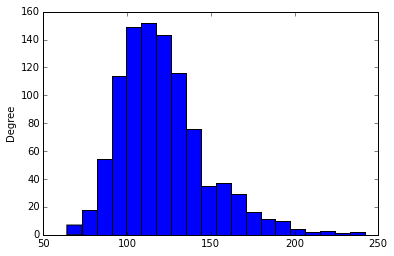

In [58]:
# create a histogram of duration, choosing an "appropriate" number of bins
movies.duration.plot(kind='hist', bins=20)

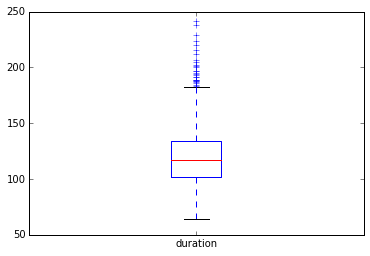

In [59]:
# use a box plot to display that same data
movies.duration.plot(kind='box')

In [60]:
'''
INTERMEDIATE LEVEL
'''

# count how many movies have each of the content ratings
movies.content_rating.value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
GP             3
TV-MA          1
dtype: int64

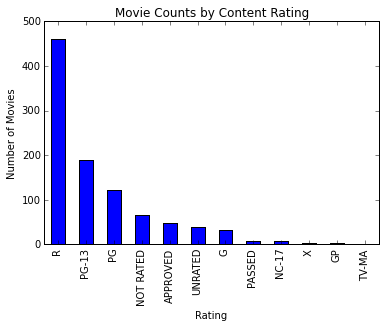

In [61]:
# use a visualization to display that same data, including a title and x and y labels
movies["content_rating"].value_counts().plot(kind="bar",title="Movie Counts by Content Rating")
plt.xlabel("Rating")
plt.ylabel("Number of Movies")


In [112]:
# convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP
movies = pd.read_csv("imdb_1000.csv")
movies.loc[(movies.content_rating=="NOT RATED") | (movies.content_rating=="APPROVED") | (movies.content_rating=="PASSED") | (movies.content_rating=="GP"),"content_rating"]="UNRATED"
movies.content_rating.value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17        7
X            4
TV-MA        1
dtype: int64

In [114]:
# convert the following content ratings to "NC-17": X, TV-MA
movies.loc[(movies.content_rating=="TV-MA") | (movies.content_rating=="X"), "content_rating"] = "NC-17"
movies.content_rating.value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17       12
dtype: int64

In [115]:
# count the number of missing values in each column
movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

In [116]:
# if there are missing values: examine them, then fill them in with "reasonable" values
movies[movies.content_rating.isnull()]
movies.content_rating.fillna(value="R",inplace=True)
movies.content_rating.value_counts()

R          463
PG-13      189
UNRATED    160
PG         123
G           32
NC-17       12
dtype: int64

In [120]:
# calculate the average star rating for movies 2 hours or longer,
movies[movies.duration>float(120)].star_rating.mean()
#7.953669724770622
# and compare that with the average star rating for movies shorter than 2 hours
movies[movies.duration<float(120)].star_rating.mean()
#7.838666666666657

7.838666666666657

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x110e2f690>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10c961050>]], dtype=object)

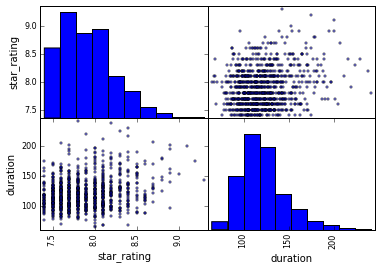

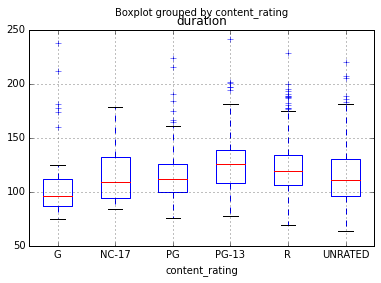

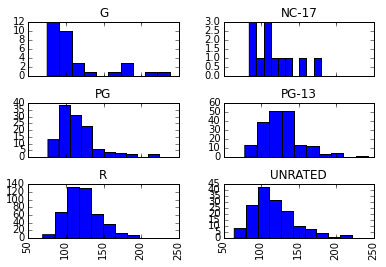

In [125]:
# use a visualization to detect whether there is a relationship between duration and star rating
pd.scatter_matrix(movies[["star_rating","duration"]])


In [123]:
# calculate the average duration for each genre
movies.groupby("genre").duration.mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

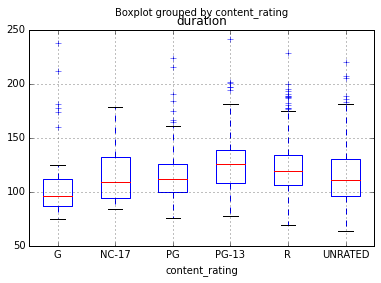

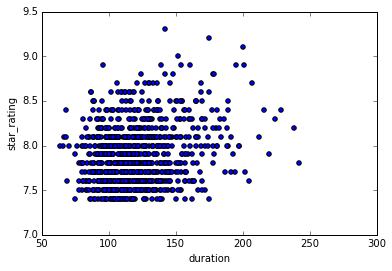

In [129]:
'''
ADVANCED LEVEL
'''

# visualize the relationship between content rating and duration
movies.boxplot(column='duration', by='content_rating')
movies.plot(kind="scatter",x="duration",y="star_rating")

In [145]:
# determine the top rated movie (by star rating) for each genre
genres = set(movies.genre.values)
top_movies = {}
for g in genres:
    top_movies[g] = movies[movies.genre==g].sort("star_rating", ascending=False).head(1).title
    
top_movies


{'Action': 3    The Dark Knight
 Name: title, dtype: object,
 'Adventure': 7    The Lord of the Rings: The Return of the King
 Name: title, dtype: object,
 'Animation': 30    Spirited Away
 Name: title, dtype: object,
 'Biography': 8    Schindler's List
 Name: title, dtype: object,
 'Comedy': 25    Life Is Beautiful
 Name: title, dtype: object,
 'Crime': 0    The Shawshank Redemption
 Name: title, dtype: object,
 'Drama': 5    12 Angry Men
 Name: title, dtype: object,
 'Family': 468    E.T. the Extra-Terrestrial
 Name: title, dtype: object,
 'Fantasy': 638    The City of Lost Children
 Name: title, dtype: object,
 'Film-Noir': 105    The Third Man
 Name: title, dtype: object,
 'History': 338    Battleship Potemkin
 Name: title, dtype: object,
 'Horror': 39    Psycho
 Name: title, dtype: object,
 'Mystery': 38    Rear Window
 Name: title, dtype: object,
 'Sci-Fi': 145    Blade Runner
 Name: title, dtype: object,
 'Thriller': 350    Shadow of a Doubt
 Name: title, dtype: object,
 'Wester

In [149]:
# check if there are multiple movies with the same title, and if so, determine if they are actually duplicates
dupe_titles = movies[movies.title.duplicated()]
movies[movies.title.isin(dupe_titles)]

,star_rating,title,content_rating,genre,duration,actors_list


In [152]:
# calculate the average star rating for each genre, but only include genres with at least 10 movies


pandas.core.series.Series

In [154]:
# option 1: manually create a list of relevant genres, then filter using that list
genre_gt_10 = ['Drama', 'Comedy', 'Action', 'Crime', 'Biography', 'Adventure', 'Animation', 'Horror', 'Mystery']
movies[movies.genre.isin(genre_gt_10)].groupby('genre').star_rating.mean()

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

In [161]:
# option 2: automatically create a list of relevant genres by saving the value_counts and then filtering
genre_cnts = movies.genre.value_counts()
genre_cnts = genre_cnts[genre_cnts>10].index
movies[movies.genre.isin(genre_cnts)].groupby('genre').star_rating.mean()

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

In [166]:
# option 3: calculate the average star rating for all genres, then filter using a boolean Series
averages = movies.groupby("genre").star_rating.mean()[movies.genre.value_counts()>10]
averages

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

In [170]:
# option 4: aggregate by count and mean, then filter using the count
ratings1 = movies.groupby('genre').star_rating.agg(['count','mean'])
ratings1[ratings1['count'] >= 10]

,count,mean
genre,,
Action,136,7.884559
Adventure,75,7.933333
Animation,62,7.914516
Biography,77,7.862338
Comedy,156,7.822436
Crime,124,7.916935
Drama,278,7.902518
Horror,29,7.806897
Mystery,16,7.975000


In [27]:
'''
BONUS
'''

# Figure out something "interesting" using the actors data!


'\nBONUS\n'